In [1]:
import os
import gzip
import sys
import pyBigWig
import numpy as np

In [2]:
tfToBed = {}
tfToBed["cbf1"] = "data/cbf1/old_peaks/1000_around_summits.bed.gz"
tfToBed["fixed_cbf1"] = "data/cbf1/1000_around_summits.bed.gz"
tfToBed["pho4"] = "data/pho4/1000_around_summits.bed.gz"

In [3]:
!zcat {tfToBed["cbf1"]} | wc -l
!zcat {tfToBed["fixed_cbf1"]} | wc -l
!zcat {tfToBed["pho4"]} | wc -l

10449
917
6086


In [4]:
tfToBigWigs = {}
tfToBigWigs["cbf1"] = (pyBigWig.open("data/cbf1/pos_strand.bw"),
                       pyBigWig.open("data/cbf1/neg_strand.bw"))
tfToBigWigs["fixed_cbf1"] = (pyBigWig.open("data/cbf1/pos_strand.bw"),
                             pyBigWig.open("data/cbf1/neg_strand.bw"))
tfToBigWigs["pho4"] = (pyBigWig.open("data/pho4/pos_strand.bw"),
                       pyBigWig.open("data/pho4/neg_strand.bw"))

In [5]:
tfToCounts = {}
tfToCounts["cbf1"] = ([],[])
tfToCounts["fixed_cbf1"] = ([],[])
tfToCounts["pho4"] = ([],[])

In [6]:
for key in tfToBed.keys():
    with gzip.open(tfToBed[key],'rt') as f:
        for line in f:
            chrm, start, end, _ = line.rstrip().split('\t')
            posvals = np.array(tfToBigWigs[key][0].values(chrm, int(start), int(end)))
            where_are_NaNs = np.isnan(posvals)
            posvals[where_are_NaNs] = 0.0
            tfToCounts[key][0].append(np.sum(posvals))
            negvals = np.array(tfToBigWigs[key][1].values(chrm, int(start), int(end)))
            where_are_NaNs = np.isnan(negvals)
            negvals[where_are_NaNs] = 0.0
            tfToCounts[key][1].append(np.sum(np.abs(negvals)))

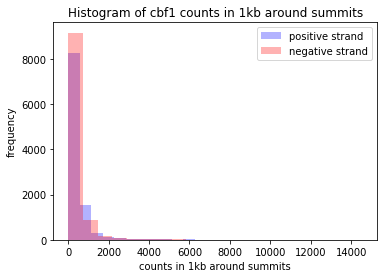

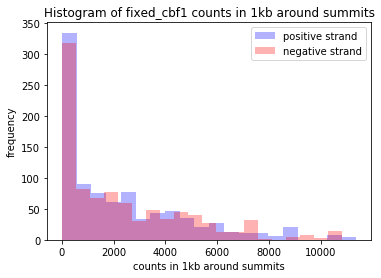

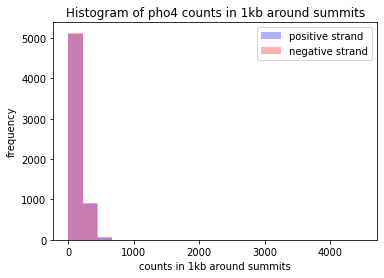

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline  

num_bins = 20
for key in tfToBed.keys():
    plt.hist(tfToCounts[key][0], num_bins, facecolor='blue', alpha=0.3, label='positive strand')    
    plt.hist(tfToCounts[key][1], num_bins, facecolor='red', alpha=0.3, label='negative strand')
    plt.xlabel('counts in 1kb around summits')
    plt.ylabel('frequency')
    plt.title(r'Histogram of '+key+' counts in 1kb around summits')
    plt.legend(loc='upper right')
    plt.subplots_adjust(left=0.15)
    plt.show()